# Imports

In [1]:
from pprint import pprint
import json
from IPython.display import display
from hamilton import driver

import __init__ as xgboost_optuna

# Load config examples

In [2]:
def read_jsonl(file_path: str) -> list:
    data = []
    with open(file_path, "r") as f:
        for line in f.readlines():
            data.append(json.loads(line))
    return data

valid_configs = read_jsonl("valid_configs.jsonl")
pprint(valid_configs, width=1)

[{'task': 'classification'},
 {'task': 'regression'}]


Note: Hamilton collects completely anonymous data about usage. This will help us improve Hamilton over time. See https://github.com/dagworks-inc/hamilton#usage-analytics--data-privacy for details.


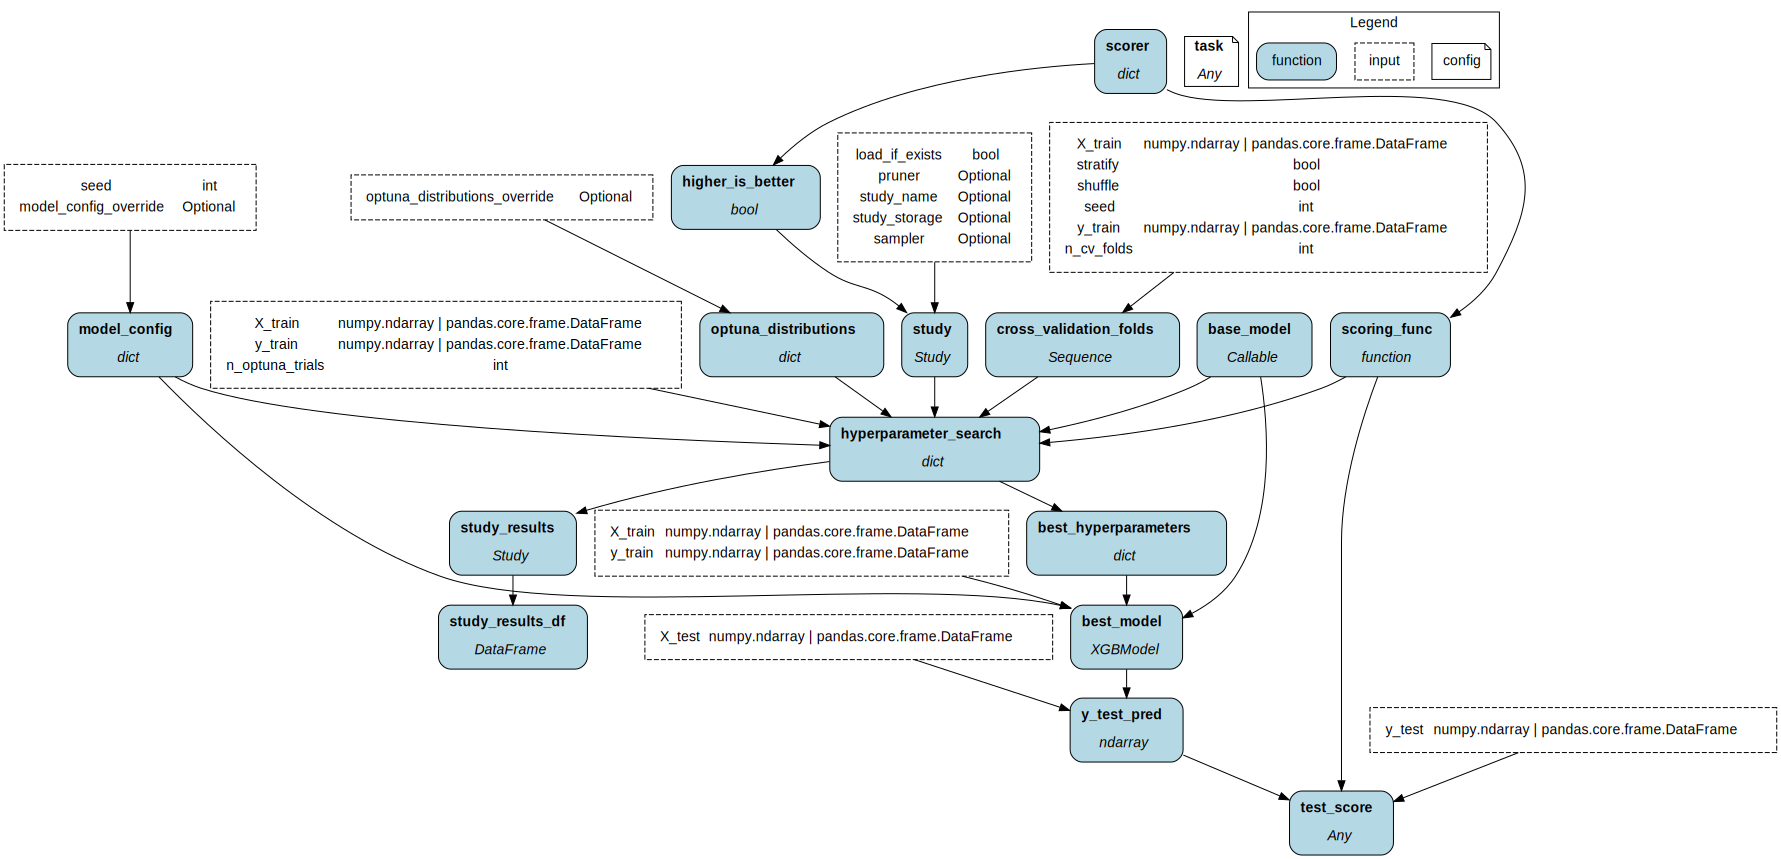

In [3]:
config = dict(
    task="classification"
)

dr = (
    driver.Builder()
    .with_modules(xgboost_optuna)
    .with_config(config)
    .build()
)

display(dr.display_all_functions(None, orient="TB"))

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Boston Housing dataset (regression example)
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [7]:
final_vars = [v for v in dr.graph.get_nodes() if v._tags.get("module") == "__init__"]

inputs = dict(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)

overrides = dict()

res = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides
)

pprint(list(res.keys()), width=1)

[I 2023-10-27 19:07:24,676] A new study created in memory with name: no-name-f5a6ea86-4b6c-4805-b5b5-d3db18771b86


['base_model',
 'best_model',
 'cross_validation_folds',
 'hyperparameter_search',
 'study_results',
 'best_hyperparameters',
 'model_config',
 'optuna_distributions',
 'scorer',
 'scoring_func',
 'higher_is_better',
 'study',
 'study_results_df',
 'test_score',
 'y_test_pred']


In [9]:
res["study_results_df"]

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_max_delta_step,params_max_depth,params_min_child_weight,params_n_estimators,state
0,0,0.938451,2023-10-27 19:07:24.677858,2023-10-27 19:07:25.159863,0 days 00:00:00.482005,0.662668,18.162984,0.046331,6,10,1,700,COMPLETE
1,1,0.966989,2023-10-27 19:07:25.160009,2023-10-27 19:07:25.289743,0 days 00:00:00.129734,0.781939,0.281130,0.084685,8,3,1,250,COMPLETE
2,2,0.971390,2023-10-27 19:07:25.289875,2023-10-27 19:07:25.483036,0 days 00:00:00.193161,0.752015,0.047018,0.090246,3,7,1,700,COMPLETE
3,3,0.958188,2023-10-27 19:07:25.483285,2023-10-27 19:07:26.049349,0 days 00:00:00.566064,0.952319,0.357577,0.014098,0,3,7,550,COMPLETE
4,4,0.958203,2023-10-27 19:07:26.049490,2023-10-27 19:07:26.284952,0 days 00:00:00.235462,0.566256,2.996323,0.026967,4,7,1,400,COMPLETE
5,5,0.969197,2023-10-27 19:07:26.285088,2023-10-27 19:07:26.600701,0 days 00:00:00.315613,0.538976,0.066454,0.032400,1,10,4,700,COMPLETE
6,6,0.947223,2023-10-27 19:07:26.600836,2023-10-27 19:07:26.743772,0 days 00:00:00.142936,0.727392,11.238290,0.042310,3,6,2,250,COMPLETE
7,7,0.958203,2023-10-27 19:07:26.743911,2023-10-27 19:07:27.098564,0 days 00:00:00.354653,0.510622,5.068645,0.016495,4,10,1,700,COMPLETE
8,8,0.967004,2023-10-27 19:07:27.098709,2023-10-27 19:07:27.603019,0 days 00:00:00.504310,0.674292,0.122961,0.011985,10,3,4,550,COMPLETE
9,9,0.975790,2023-10-27 19:07:27.603178,2023-10-27 19:07:27.757412,0 days 00:00:00.154234,0.547927,0.035147,0.078895,5,6,2,250,COMPLETE


In [10]:
res["test_score"]

0.956140350877193

In [11]:
res["best_hyperparameters"]

{'n_estimators': 250,
 'learning_rate': 0.07889492017880499,
 'max_depth': 6,
 'gamma': 0.03514738204045661,
 'colsample_bytree': 0.5479271132206868,
 'min_child_weight': 2,
 'max_delta_step': 5}